___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

### Import Libraries & Methods

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [145]:
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
def split_feature_types(dataframe):
    num_features = dataframe.select_dtypes(exclude="object")
    cat_features = dataframe.select_dtypes(include="object")
    return num_features, cat_features

def show_feature_corr(df, target_feature):
    corr_matrix = df.corr(numeric_only=True)
    print(corr_matrix[target_feature].sort_values(ascending=False))

def plot_missing_values(df):
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 1. Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [147]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [148]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [149]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [150]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## 2. Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

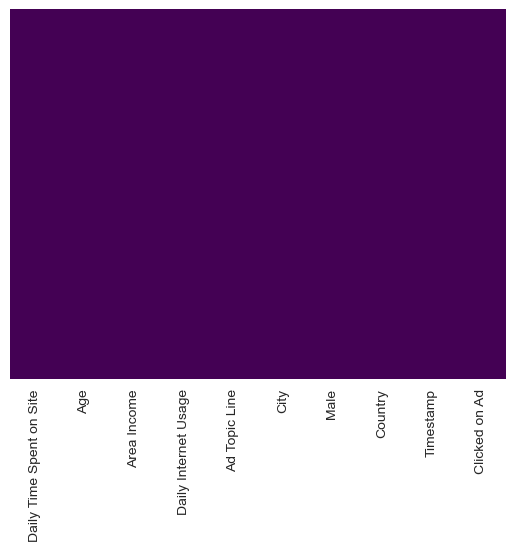

In [189]:
plot_missing_values(ad_data)

In [171]:
from sklearn.model_selection import train_test_split

# target label
label = "Clicked on Ad"

# random_state parameter specifies the random generator seed
train, test = train_test_split(ad_data, test_size=0.33, random_state=42)

In [172]:
show_feature_corr(train, label)

Clicked on Ad               1.000000
Age                         0.481116
Male                       -0.024218
Area Income                -0.508578
Daily Time Spent on Site   -0.734143
Daily Internet Usage       -0.805424
Name: Clicked on Ad, dtype: float64


In [173]:
num_features, cat_features = split_feature_types(train)

In [178]:
num_features.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
703,77.65,28,66198.66,208.01,0,0


In [176]:
cat_features.head(1)

,Ad Topic Line,City,Country,Timestamp
703,Configurable impactful capacity,Pamelamouth,Ukraine,2016-02-26 19:35:54


In [184]:
train['Ad Topic Line'].value_counts().sort_values(ascending=True)

Configurable impactful capacity                1
Versatile next generation pricing structure    1
Team-oriented systematic installation          1
Front-line non-volatile implementation         1
Cloned 5thgeneration orchestration             1
                                              ..
Focused 24hour implementation                  1
Business-focused real-time toolset             1
Re-engineered composite moratorium             1
Programmable didactic capacity                 1
Innovative background conglomeration           1
Name: Ad Topic Line, Length: 670, dtype: int64

### Convert Timestamp to Time Object

In [155]:
train['Timestamp'] = pd.to_datetime(train['Timestamp'])

In [156]:
train['Hour'] = train['Timestamp'].apply(lambda t: t.hour)
train['Month'] = train['Timestamp'].apply(lambda t: t.month)
train['DayOfWeek'] = train['Timestamp'].apply(lambda t: t.dayofweek)

In [157]:
train['Hour'].head()

703    19
311    16
722    23
629     1
0       0
Name: Hour, dtype: int64

In [158]:
train['Month'].head()

703    2
311    3
722    7
629    1
0      3
Name: Month, dtype: int64

In [159]:
train['DayOfWeek'].head()

703    4
311    6
722    2
629    6
0      6
Name: DayOfWeek, dtype: int64

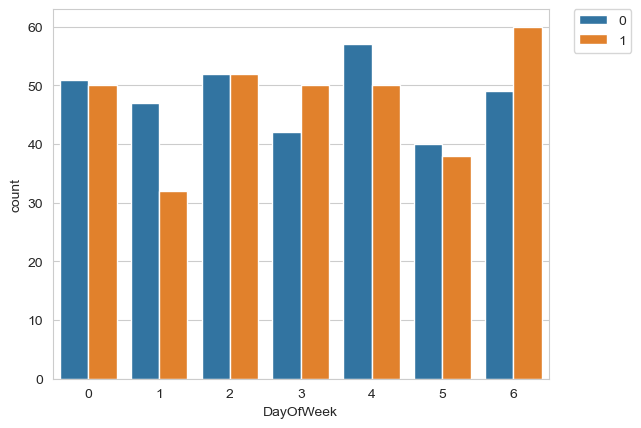

In [160]:
sns.countplot(x="DayOfWeek", hue="Clicked on Ad", data=train)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

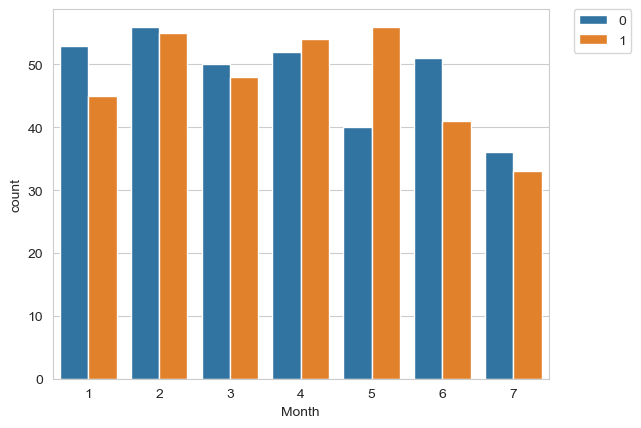

In [161]:
sns.countplot(x="Month", hue="Clicked on Ad", data=train)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

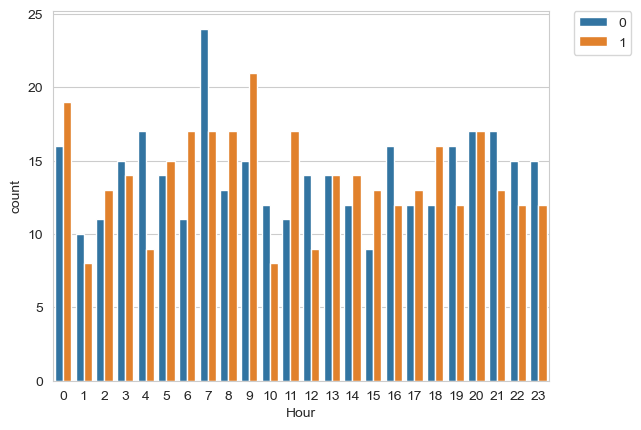

In [162]:
sns.countplot(x="Hour", hue="Clicked on Ad", data=train)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Age')

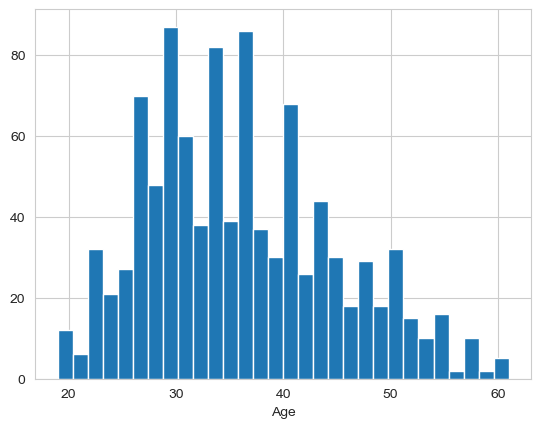

In [188]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

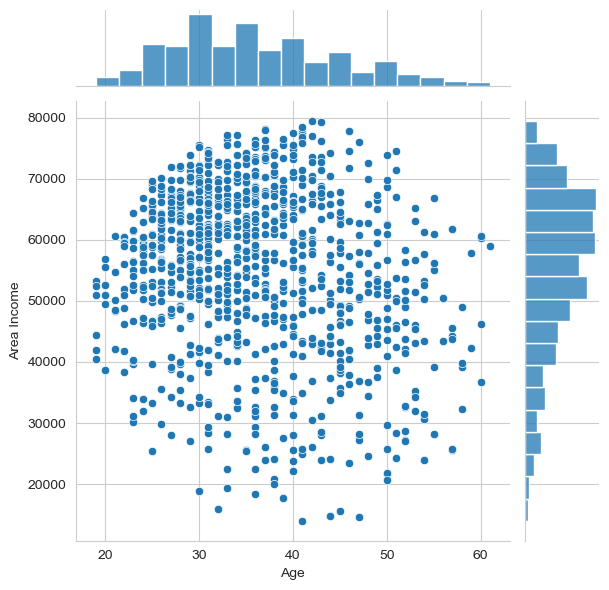

In [143]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

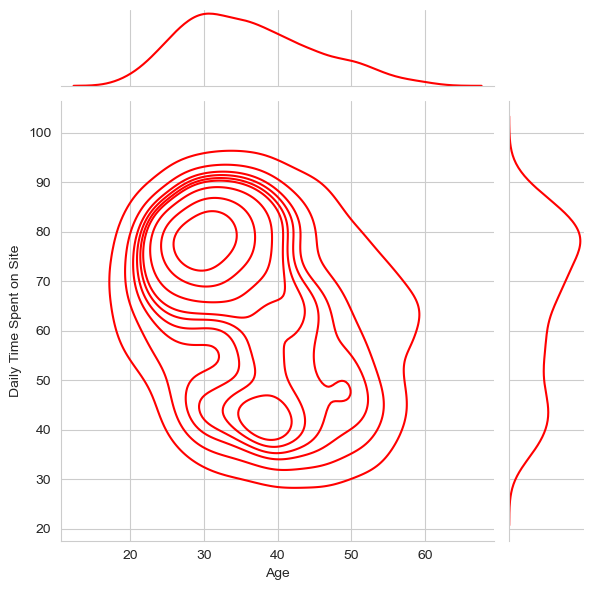

In [15]:
sns.jointplot(x="Age", y='Daily Time Spent on Site', data=ad_data, kind='kde', color="red")

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

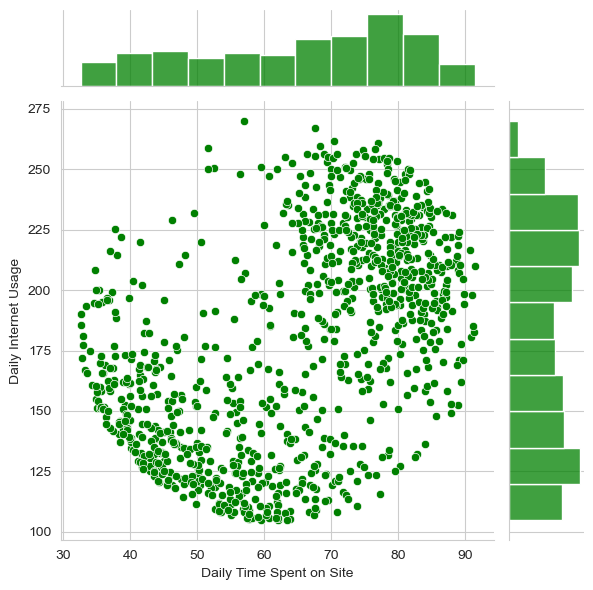

In [16]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color="green")

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

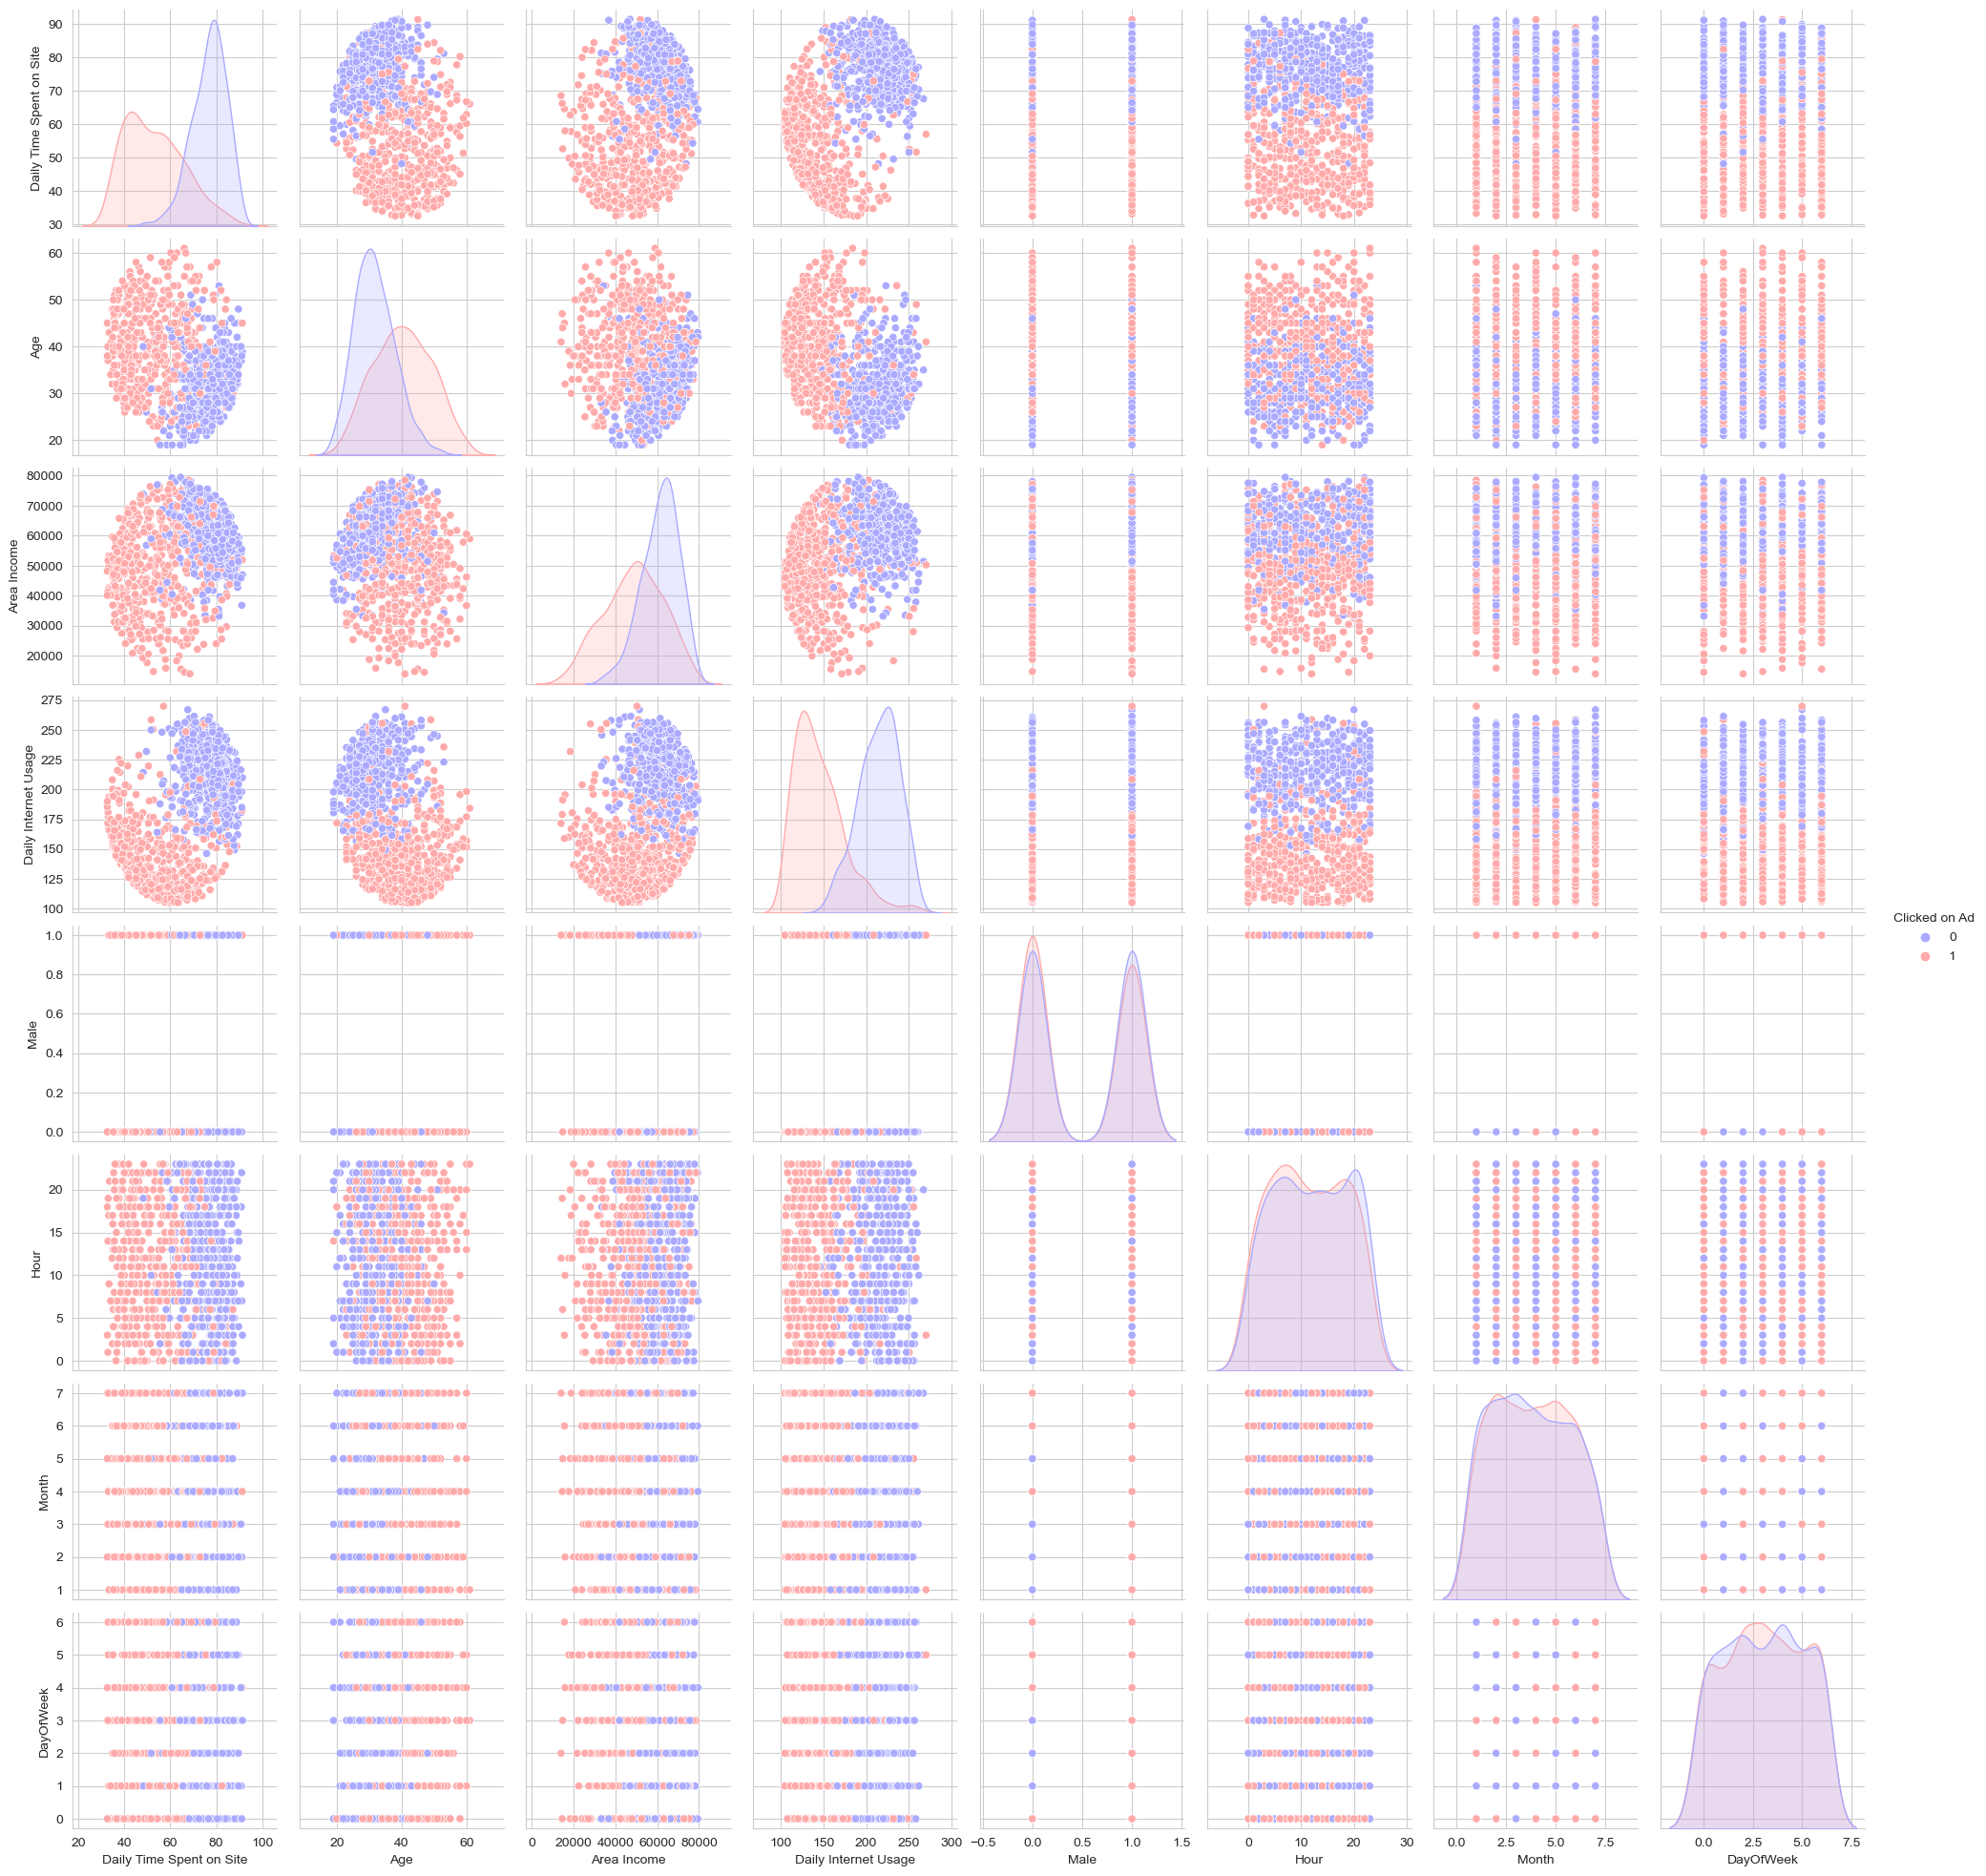

In [94]:
sns.pairplot(ad_data, hue="Clicked on Ad", palette='bwr')

In [ ]:
sns.scatterplot(x="Daily Time Spent on Site", y='Daily Internet Usage', data=ad_data, hue="Clicked on Ad")

<Axes: xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

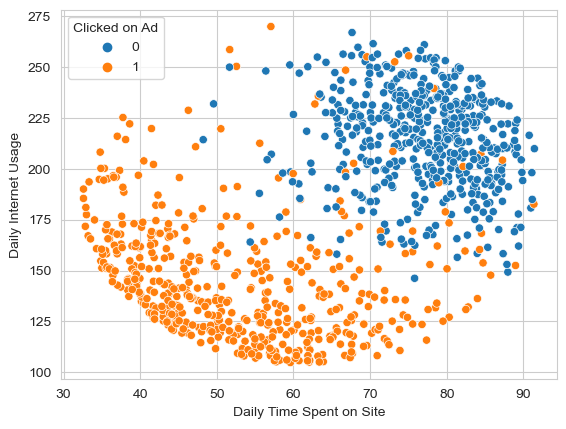

In [42]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", kind="scatter", data=customers)

In [114]:
from sklearn.model_selection import train_test_split

# random_state parameter specifies the random generator seed
train_set, test_set = train_test_split(ad_data, test_size=0.33, random_state=42)

In [186]:
show_feature_corr(train, label)

Clicked on Ad               1.000000
Age                         0.481116
Male                       -0.024218
Area Income                -0.508578
Daily Time Spent on Site   -0.734143
Daily Internet Usage       -0.805424
Name: Clicked on Ad, dtype: float64


Clicked on Ad               1.000000
Age                         0.481116
Male                       -0.024218
Area Income                -0.508578
Daily Time Spent on Site   -0.734143
Daily Internet Usage       -0.805424
Name: Clicked on Ad, dtype: float64


## 3. Prepare the Data

### Split Data into Train/Test Set

In [201]:
X = ad_data[['Age', 'Area Income', 'Daily Time Spent on Site', 'Daily Internet Usage']]
y = ad_data['Clicked on Ad']

In [200]:
from sklearn.model_selection import train_test_split

# random_state parameter specifies the random generator seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 4. Train Models

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Train and fit a logistic regression model on the training set.**

In [198]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

LogisticRegression()

### Predictions and Evaluations
** Now predict values for the testing data.**

In [199]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predictions = logmodel.predict(X_test)

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, predictions))
print("CONFUSION_MATRIX:")
confusion_matrix(y_test, predictions)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

CONFUSION_MATRIX:


array([[156,   6],
       [ 25, 143]])

** Create a classification report for the model.**

## 5. Fine-Tune Model

### Setup Feature Scaling

In [206]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

prepared_ad_data = num_pipeline.fit_transform(X_train)

In [207]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(prepared_ad_data, y_train)

LogisticRegression()

In [208]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predictions = logmodel.predict(X_test)

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, predictions))
print("CONFUSION_MATRIX:")
confusion_matrix(y_test, predictions)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       162
           1       0.00      0.00      0.00       168

    accuracy                           0.49       330
   macro avg       0.25      0.50      0.33       330
weighted avg       0.24      0.49      0.32       330

CONFUSION_MATRIX:


/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision a

array([[162,   0],
       [168,   0]])

## Great Job!